In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2022-12-02 18:18:14.147296: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# GPU check
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-12-02 18:18:15.630107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 18:18:15.650062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 18:18:15.650164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
# Load data
samples = np.load('suit_samples.npy')
labels = np.load('suit_labels.npy')
print(samples.shape)
print(labels.shape)

(12800, 70, 60)
(12800,)


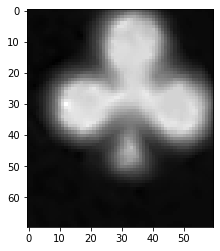

In [4]:
# Visualize a sample
plt.imshow(samples[0], cmap='gray')

In [5]:
# Shuffle data
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)
samples = samples[indices]
labels = labels[indices]

In [6]:
# Split data
ratio = 0.9
split = int(samples.shape[0] * ratio)
x_train = samples[:split]
y_train = labels[:split]
x_test = samples[split:]
y_test = labels[split:]
print(len(x_train), len(x_test))

11520 1280


In [7]:
# Choose layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(70, 60, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

2022-12-02 18:18:16.087080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI AVX512_BF16
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 18:18:16.087553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 18:18:16.087762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 18:18:16.087842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so 

In [8]:
# Choose loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [9]:
# Choose optimizer
opt = 'adam'

In [10]:
# Compile model
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])

In [11]:
# Train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2022-12-02 18:18:17.686510: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8303


 22/360 [>.............................] - ETA: 0s - loss: 2.7616 - accuracy: 0.6534  

2022-12-02 18:18:18.452558: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


360/360 [==============================] - 2s 2ms/step - loss: 0.1926 - accuracy: 0.9713
Epoch 2/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 3/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0343 - accuracy: 0.9904
Epoch 4/10
360/360 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 5/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9978
Epoch 6/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 7/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0048 - accuracy: 0.9980
Epoch 8/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 9/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9977
Epoch 10/10
360/360 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9990


In [12]:
# Evaluate model
model.evaluate(x_test, y_test, verbose=2)

40/40 - 0s - loss: 2.8136e-04 - accuracy: 1.0000 - 127ms/epoch - 3ms/step


[0.00028136419132351875, 1.0]

In [13]:
# Save model
model.save('suit_model')

INFO:tensorflow:Assets written to: suit_model/assets


INFO:tensorflow:Assets written to: suit_model/assets
